In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# To show all columns when printing
pd.set_option("display.max_columns", None)

df = pd.read_csv(r"D:\DAB322\Healthcare.csv")
df

Age  Gender   BMI  Glucose  BloodPressure  Insulin  SkinThickness  \
0      56.0  Female  27.0     76.5          68.90    16.40            8.9   
1      69.0    Male  28.9     43.5          66.20    31.90           20.5   
2      46.0  Female  27.4     82.1          75.25    79.10           16.1   
3      32.0  Female  28.9    105.5          75.10   189.80           26.2   
4      60.0    Male  24.0     84.2          79.00   100.40           24.2   
...     ...     ...   ...      ...            ...      ...            ...   
17995  46.0  Female  32.3     84.3          86.10    59.50           15.3   
17996  31.0    Male  28.9    137.2          79.80    87.30           20.0   
17997  21.0    Male  26.9    108.4          69.90    79.85           32.8   
17998  61.0    Male  28.6    139.4          66.30    92.00           20.0   
17999  73.0    Male  28.0    135.4          77.80   115.60           21.3   

       Pregnancies  DiabetesPedigreeFunction PhysicalActivityLevel  Outcome  \
0              2.0                     1.181              Moderate      0.0   
1              2.0                     0.339              Moderate      0.0   
2              2.0                     1.659                  High      1.0   
3              7.0                     2.497              Moderate      0.0   
4              8.0                     1.342                   Low      1.0   
...            ...                       ...                   ...      ...   
17995          6.0                     1.019                  High      0.0   
17996          5.0                     0.329                   Low      1.0   
17997          9.0                     0.989                  High      1.0   
17998          8.0                     1.456              Moderate      0.0   
17999          6.0                     1.398              Moderate      0.0   

            Country  Cholesterol Smoking_Status Family_History  Diet_Type  \
0         Australia        189.8            Yes             No   High-Fat   
1                UK        235.4            Yes            Yes  High-Carb   
2      South Africa        143.7             No             No   Balanced   
3            Canada        219.5            Yes             No   Balanced   
4                UK        219.0             No            Yes   High-Fat   
...             ...          ...            ...            ...        ...   
17995       Germany        179.8             No            Yes   Balanced   
17996  South Africa        101.5             No             No  High-Carb   
17997       Germany        229.8             No             No   Balanced   
17998        Canada        214.1            Yes            Yes  High-Carb   
17999        Brazil        221.1             No            Yes   High-Fat   

       Sleep_Hours  Daily_Steps  Water_Intake_Liters Mental_Health_Status  \
0              8.5       4878.0                  3.7                 Good   
1              4.9       5604.0                  3.1                 Good   
2              7.0       7533.0                  2.6                 Good   
3              6.2       5963.0                  2.6                 Poor   
4              8.0       3201.0                  2.6              Average   
...            ...          ...                  ...                  ...   
17995          6.0       5513.0                  1.2                 Good   
17996          6.3       5859.0                  3.4                 Poor   
17997          5.0       5386.0                  1.7              Average   
17998          8.2      12200.0                  4.1                 Poor   
17999          7.3       1208.0                  3.3              Average   

      Sleep_Quality Chronic_Disease Work_Stress_Level Alcohol_Consumption  \
0              Fair         Thyroid              High             Regular   
1              Fair   Heart Disease          Moderate          Occasional   
2              Good         Thyroid          Moderate

## Basic Dataset Overview

In [3]:
print("Shape of dataset:", df.shape)

Shape of dataset: (18000, 30)


In [4]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
    Age  Gender   BMI  Glucose  BloodPressure  Insulin  SkinThickness  \
0  56.0  Female  27.0     76.5          68.90     16.4            8.9   
1  69.0    Male  28.9     43.5          66.20     31.9           20.5   
2  46.0  Female  27.4     82.1          75.25     79.1           16.1   
3  32.0  Female  28.9    105.5          75.10    189.8           26.2   
4  60.0    Male  24.0     84.2          79.00    100.4           24.2   

   Pregnancies  DiabetesPedigreeFunction PhysicalActivityLevel  Outcome  \
0          2.0                     1.181              Moderate      0.0   
1          2.0                     0.339              Moderate      0.0   
2          2.0                     1.659                  High      1.0   
3          7.0                     2.497              Moderate      0.0   
4          8.0                     1.342                   Low      1.0   

        Country  Cholesterol Smoking_Status Family_History  Diet_Type  \
0     Australia       

In [5]:
df.columns

Index(['Age', 'Gender', 'BMI', 'Glucose', 'BloodPressure', 'Insulin',
       'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction',
       'PhysicalActivityLevel', 'Outcome', 'Country', 'Cholesterol',
       'Smoking_Status', 'Family_History', 'Diet_Type', 'Sleep_Hours',
       'Daily_Steps', 'Water_Intake_Liters', 'Mental_Health_Status',
       'Sleep_Quality', 'Chronic_Disease', 'Work_Stress_Level',
       'Alcohol_Consumption', 'Diabetes_Status', 'Diabetes_Type',
       'Fast_Food_Intake', 'Prediabetes', 'Fasting_Blood_Sugar',
       'Screen_Time'],
      dtype='object')

In [6]:
df.dtypes

Age                         float64
Gender                       object
BMI                         float64
Glucose                     float64
BloodPressure               float64
Insulin                     float64
SkinThickness               float64
Pregnancies                 float64
DiabetesPedigreeFunction    float64
PhysicalActivityLevel        object
Outcome                     float64
Country                      object
Cholesterol                 float64
Smoking_Status               object
Family_History               object
Diet_Type                    object
Sleep_Hours                 float64
Daily_Steps                 float64
Water_Intake_Liters         float64
Mental_Health_Status         object
Sleep_Quality                object
Chronic_Disease              object
Work_Stress_Level            object
Alcohol_Consumption          object
Diabetes_Status              object
Diabetes_Type                object
Fast_Food_Intake             object
Prediabetes                 

## Check Missing Values

In [7]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_summary = pd.DataFrame({
    "Missing Values": missing,
    "Missing %": missing_percent.round(2)
})

print("\nMissing Values Summary:")
print(
    missing_summary[missing_summary["Missing Values"] > 0]
    .sort_values("Missing %", ascending=False)
)


Missing Values Summary:
                     Missing Values  Missing %
BMI                               5       0.03
Glucose                           5       0.03
Sleep_Hours                       5       0.03
Daily_Steps                       5       0.03
Water_Intake_Liters               5       0.03


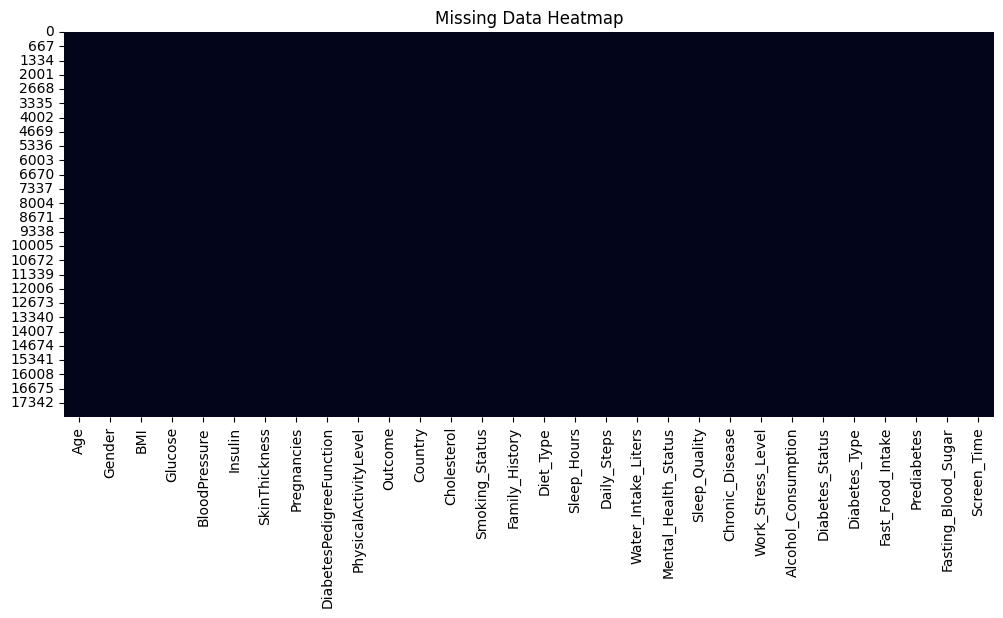

In [8]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
print("\nSummary Statistics (Numeric Columns):")
df.describe()


Summary Statistics (Numeric Columns):


Age           BMI       Glucose  BloodPressure       Insulin  \
count  18000.000000  17995.000000  17995.000000   18000.000000  18000.000000   
mean      48.591056     28.015793    109.903351      75.112711     80.071211   
std       17.629407      5.899675     34.562562      11.836675     44.434725   
min       18.000000      4.900000    -46.300000      25.100000   -120.800000   
25%       34.000000     24.100000     87.100000      67.200000     51.175000   
50%       48.000000     28.200000    108.700000      75.250000     79.850000   
75%       64.000000     32.000000    132.900000      83.000000    108.800000   
max       79.000000     54.900000    240.500000     119.900000    249.200000   

       SkinThickness   Pregnancies  DiabetesPedigreeFunction       Outcome  \
count   18000.000000  18000.000000              18000.000000  18000.000000   
mean       19.982994      4.448167                  1.301701      0.286389   
std         7.871159      2.828718                  0.681769      0.452086   
min        -9.600000      0.000000                  0.100000      0.000000   
25%        14.800000      2.000000                  0.721000      0.000000   
50%        20.000000      4.000000                  1.294000      0.000000   
75%        25.100000      7.000000                  1.884000      1.000000   
max        50.600000      9.000000                  2.500000      1.000000   

        Cholesterol   Sleep_Hours   Daily_Steps  Water_Intake_Liters  \
count  18000.000000  17995.000000  17995.000000         17995.000000   
mean     199.731939      7.016605   6020.197888             2.500072   
std       39.580036      1.493874   2475.720091             0.797083   
min       33.100000      1.300000  -3980.000000            -0.600000   
25%      173.400000      6.000000   4361.500000             2.000000   
50%      199.800000      7.000000   6060.000000             2.500000   
75%      226.400000      8.000000   7652.500000             3.000000   
max      358.300000     12.200000  15152.000000             6.100000   

       Fasting_Blood_Sugar   Screen_Time  
count         18000.000000  18000.000000  
mean            110.207017      6.524706  
std              35.141720      3.177019  
min             -18.500000      1.000000  
25%              86.200000      3.800000  
50%             110.200000      6.500000  
75%             134.300000      9.300000  
max             242.800000     12.000000

## Data Type Cleaning Summary

In [10]:
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include="object").columns

# Fill numeric with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after filling:\n", df.isnull().sum().sum())

Missing values after filling:
 0


In [11]:
categorical_cols = df.select_dtypes(include="object").columns
print("\nCategorical Columns:", list(categorical_cols))

# Explore categorical columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print("Unique values:", df[col].nunique())
    print(df[col].value_counts().head())


Categorical Columns: ['Gender', 'PhysicalActivityLevel', 'Country', 'Smoking_Status', 'Family_History', 'Diet_Type', 'Mental_Health_Status', 'Sleep_Quality', 'Chronic_Disease', 'Work_Stress_Level', 'Alcohol_Consumption', 'Diabetes_Status', 'Diabetes_Type', 'Fast_Food_Intake', 'Prediabetes']

Column: Gender
Unique values: 3
Gender
Female    9374
Male      8621
Other        5
Name: count, dtype: int64

Column: PhysicalActivityLevel
Unique values: 3
PhysicalActivityLevel
High        6383
Low         5811
Moderate    5806
Name: count, dtype: int64

Column: Country
Unique values: 8
Country
South Africa    2630
Brazil          2259
UK              2253
India           2205
Australia       2182
Name: count, dtype: int64

Column: Smoking_Status
Unique values: 3
Smoking_Status
No         13546
Yes         4449
unknown        5
Name: count, dtype: int64

Column: Family_History
Unique values: 2
Family_History
No     10891
Yes     7109
Name: count, dtype: int64

Column: Diet_Type
Unique values: 3

In [12]:
# Convert numeric-looking object columns to numeric
numeric_like_cols = ["BMI","Glucose","Sleep_Hours","Daily_Steps","Water_Intake_Liters","Fast_Food_Intake"]

for col in numeric_like_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

## Outlier Check (Summary)

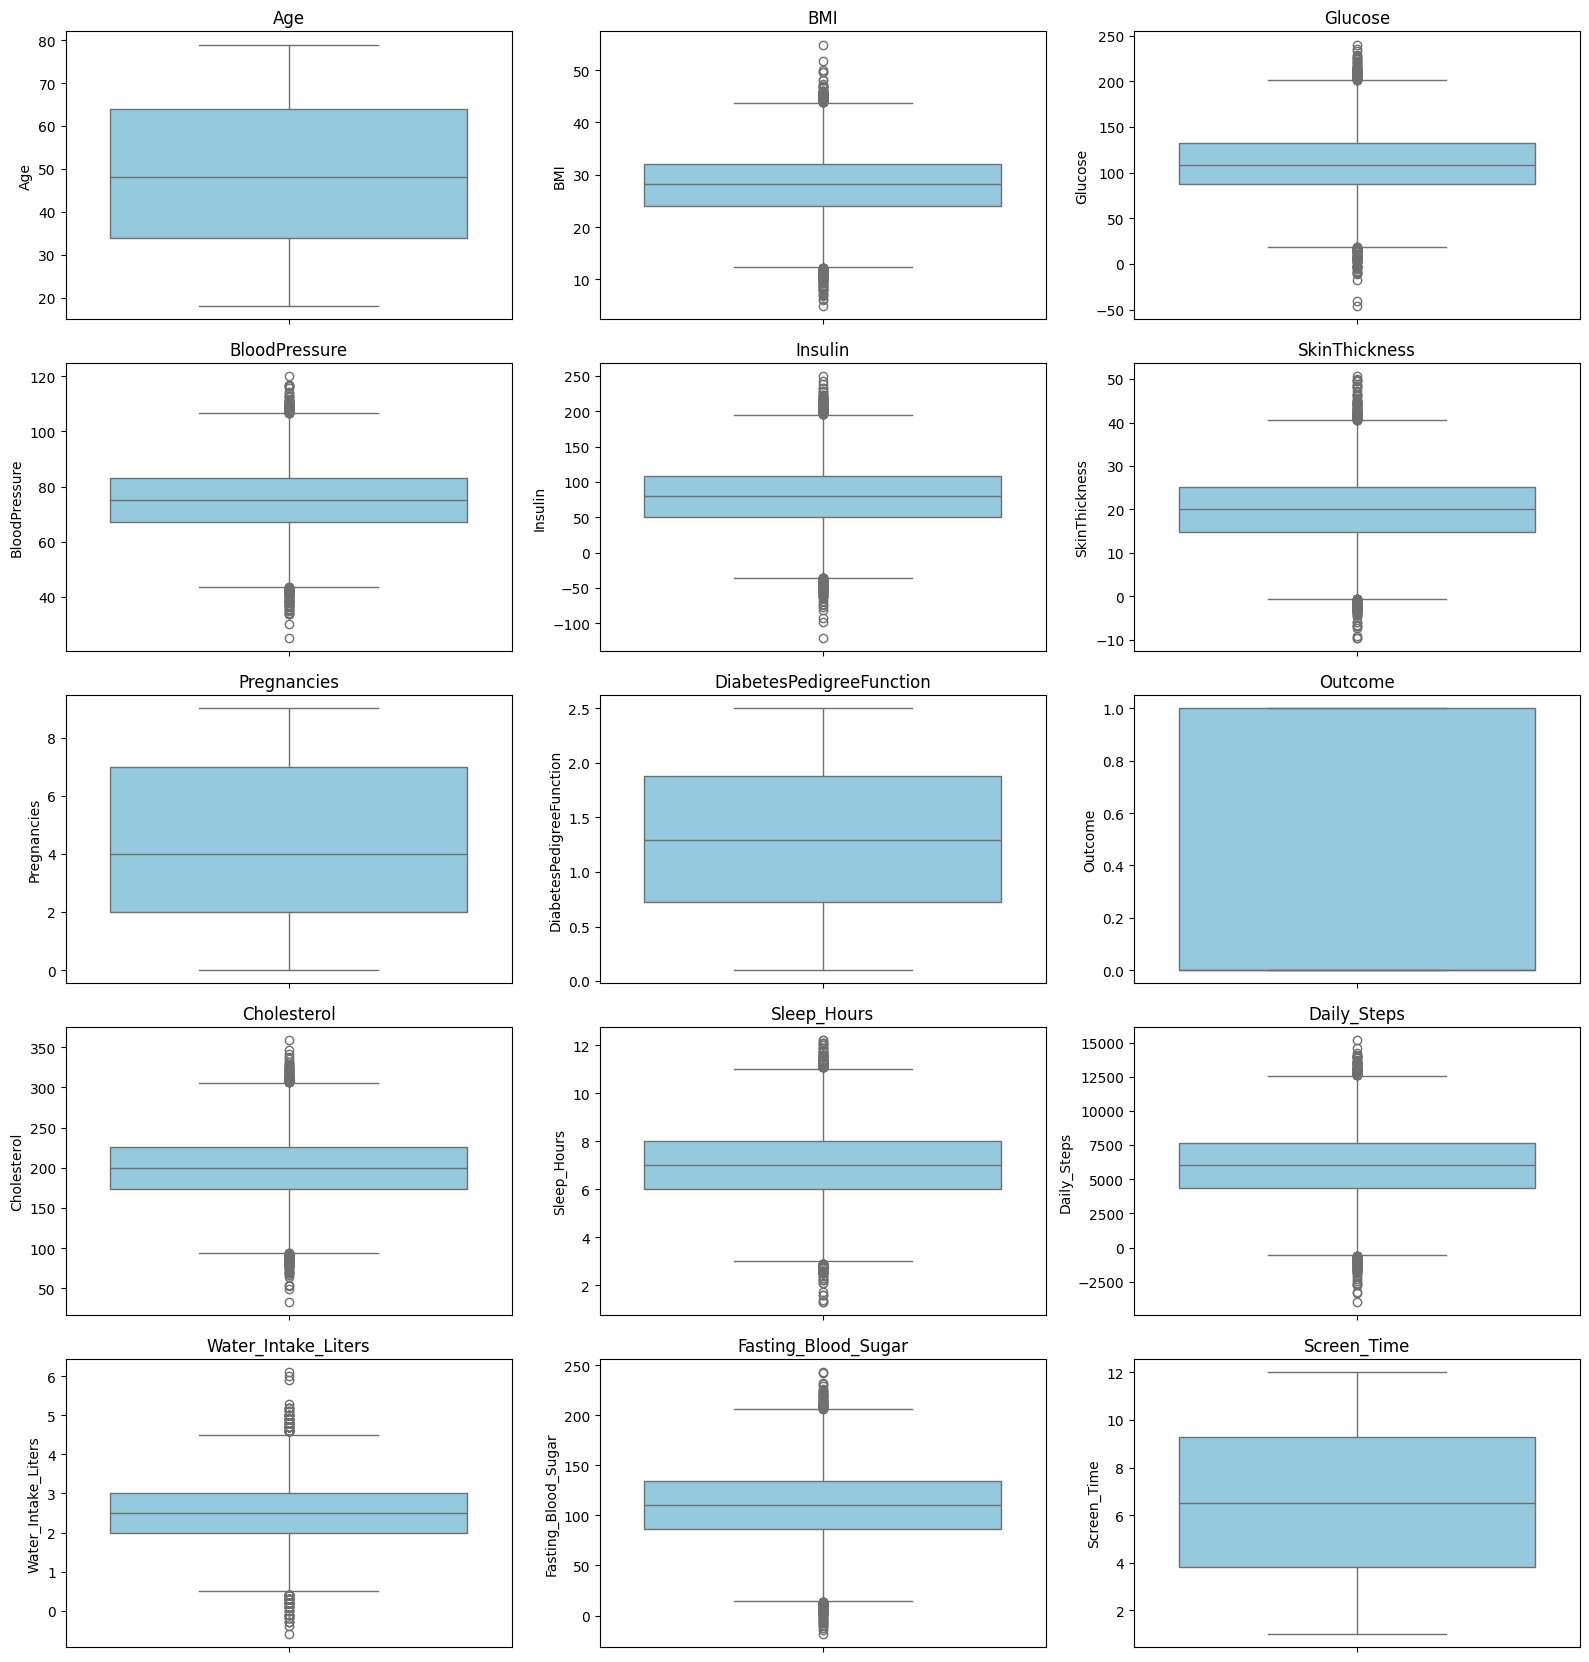

In [13]:
plt.figure(figsize=(16, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(data=df, y=col, color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

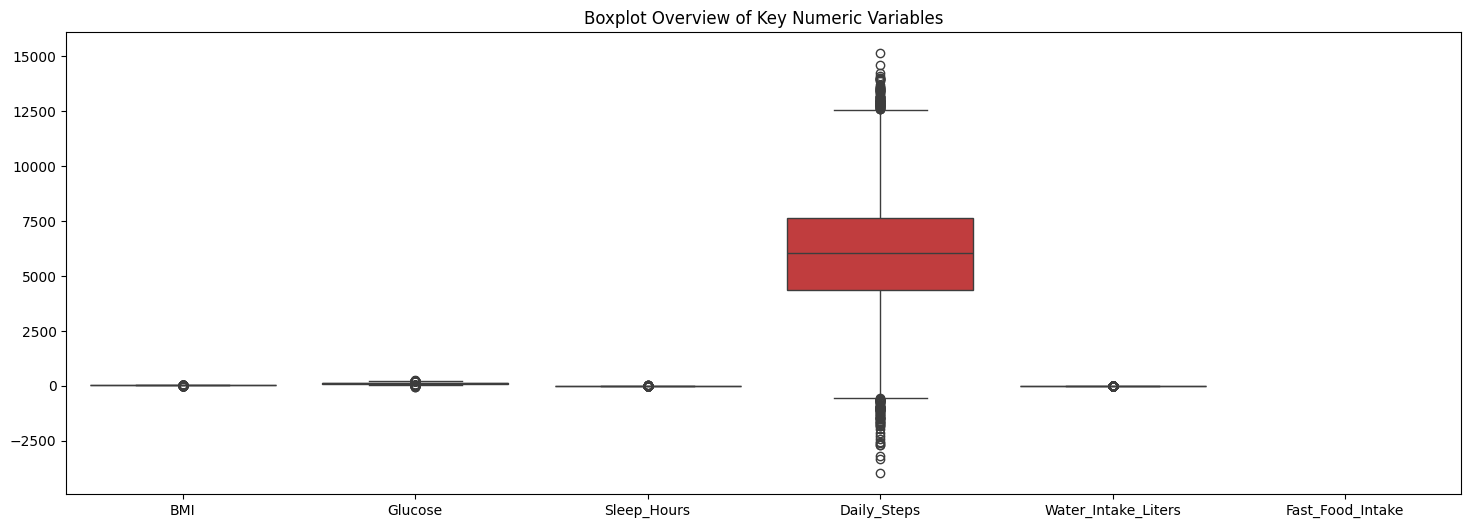

In [14]:
plt.figure(figsize=(18, 6))

cols = ["BMI","Glucose","Sleep_Hours","Daily_Steps","Water_Intake_Liters","Fast_Food_Intake"]
sns.boxplot(data=df[cols])
plt.title("Boxplot Overview of Key Numeric Variables")
plt.show()

# EDA

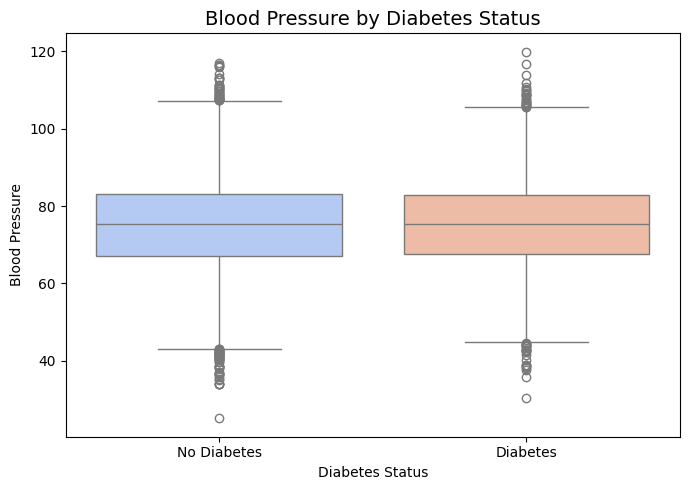

In [15]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Diabetes_Status", y="BloodPressure", palette="coolwarm")
plt.title("Blood Pressure by Diabetes Status", fontsize=14)
plt.xlabel("Diabetes Status")
plt.ylabel("Blood Pressure")
plt.tight_layout()
plt.show()

### Average Cholesterol by Gender (Bar Plot)

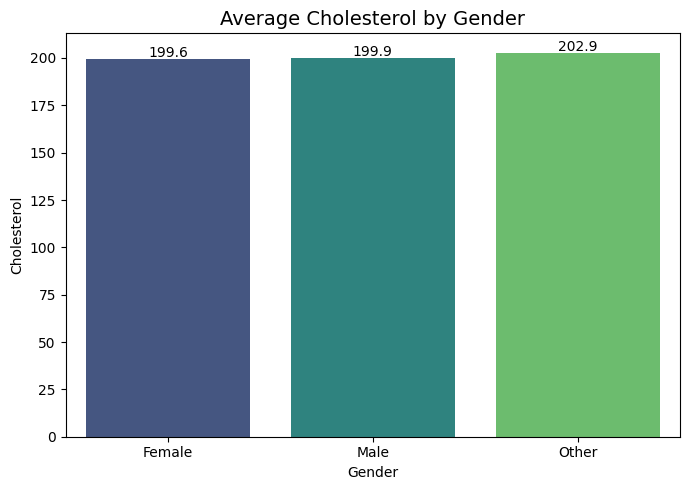

In [16]:
chol_gender = df.groupby("Gender", as_index=False)["Cholesterol"].mean()

plt.figure(figsize=(7, 5))
sns.barplot(data=chol_gender, x="Gender", y="Cholesterol", palette="viridis")
plt.title("Average Cholesterol by Gender", fontsize=14)
plt.ylabel("Cholesterol")

for i, v in enumerate(chol_gender["Cholesterol"]):
    plt.text(i, v + 1, f"{v:.1f}", ha="center")
    
plt.tight_layout()
plt.show()

### Daily Steps vs BMI (Scatter Plot)

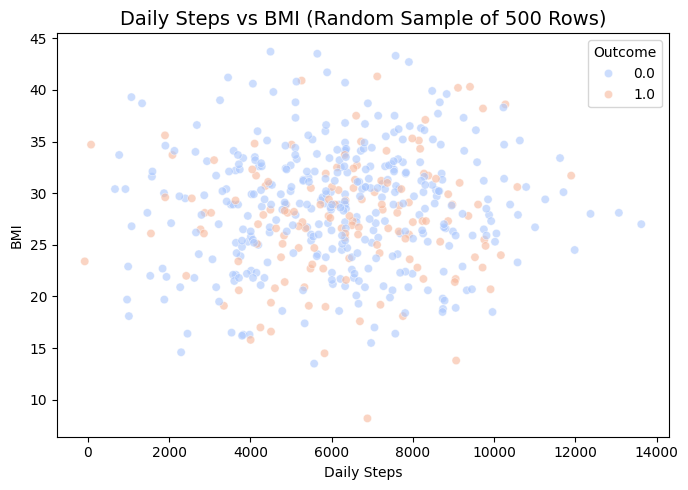

In [17]:
sample_df = df.sample(500, random_state=42)

plt.figure(figsize=(7, 5))
sns.scatterplot(data=sample_df,x="Daily_Steps",y="BMI",hue="Outcome",palette="coolwarm",alpha=0.6)
plt.title("Daily Steps vs BMI (Random Sample of 500 Rows)", fontsize=14)
plt.xlabel("Daily Steps")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

### Random Sample (2000 rows)

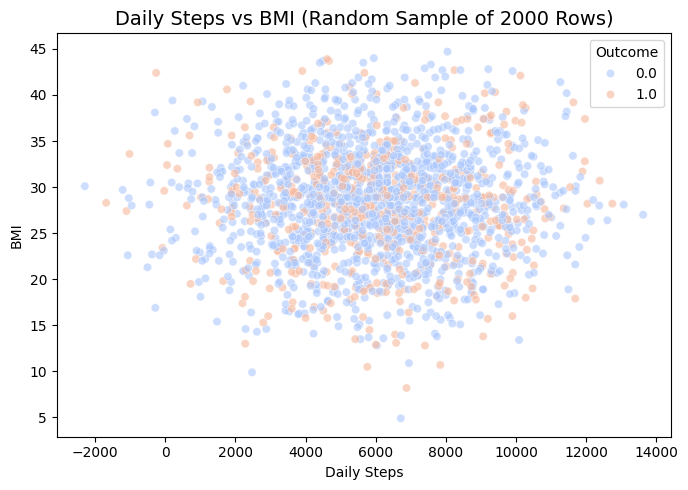

In [18]:
sample_df = df.sample(2000, random_state=42)

plt.figure(figsize=(7, 5))
sns.scatterplot(data=sample_df,x="Daily_Steps",y="BMI",hue="Outcome",palette="coolwarm",alpha=0.6)
plt.title("Daily Steps vs BMI (Random Sample of 2000 Rows)", fontsize=14)
plt.xlabel("Daily Steps")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

### More Detailed

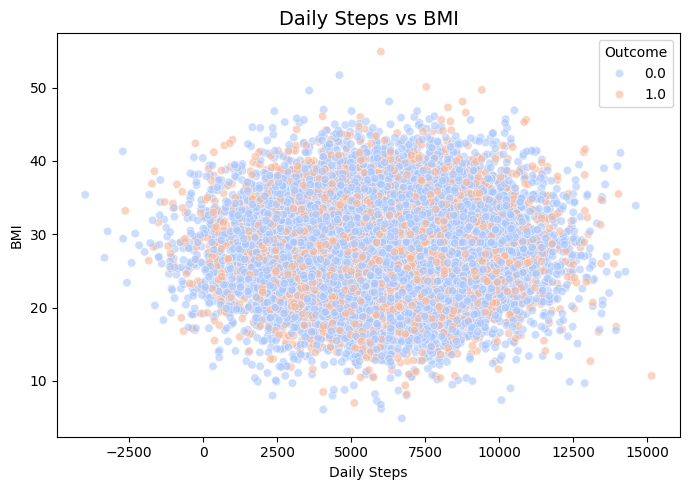

In [19]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x="Daily_Steps", y="BMI", hue="Outcome", palette="coolwarm", alpha=0.6)
plt.title("Daily Steps vs BMI", fontsize=14)
plt.xlabel("Daily Steps")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

### Sleep Hours Distribution (Histogram)

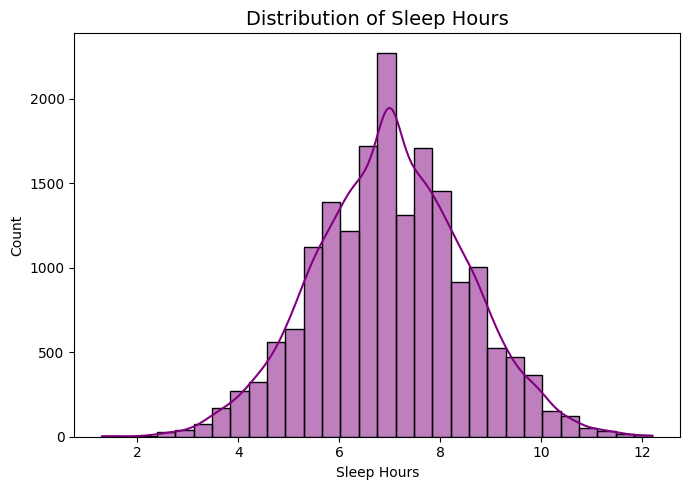

In [20]:
plt.figure(figsize=(7, 5))
sns.histplot(df["Sleep_Hours"], kde=True, bins=30, color="purple")
plt.title("Distribution of Sleep Hours", fontsize=14)
plt.xlabel("Sleep Hours")
plt.tight_layout()
plt.show()

### Categorical Frequency Heatmap

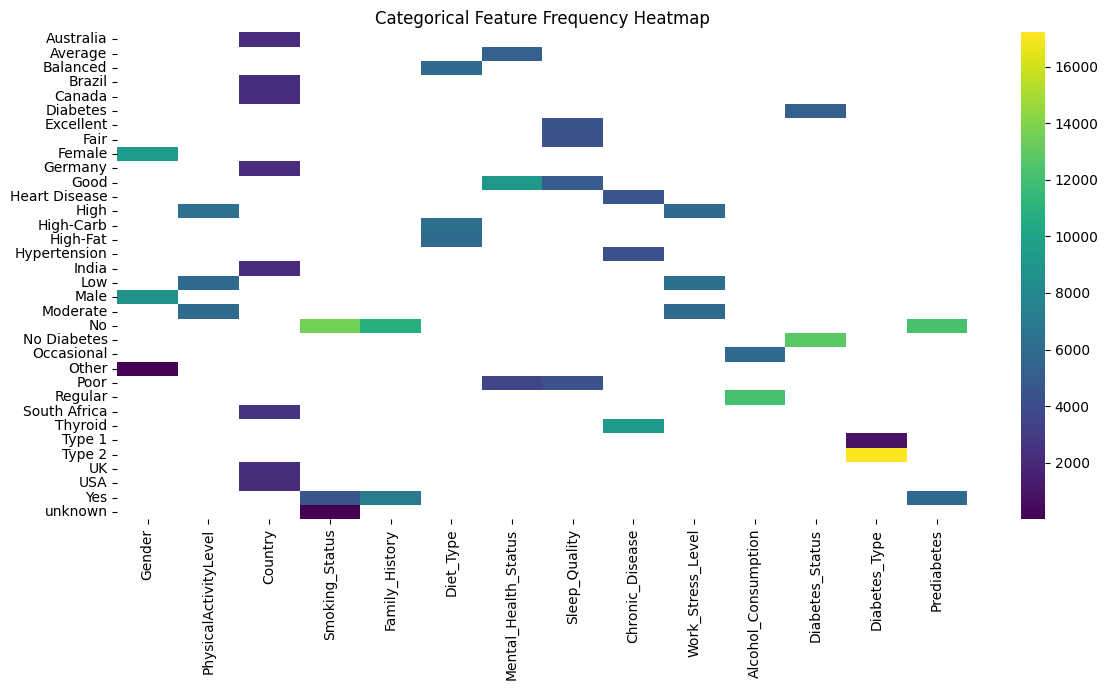

In [21]:
cat_cols = df.select_dtypes(include="object").columns

freq_df = df[cat_cols].apply(lambda x: x.value_counts())
plt.figure(figsize=(12,7))
sns.heatmap(freq_df, cmap="viridis")
plt.title("Categorical Feature Frequency Heatmap")
plt.tight_layout()
plt.show()

### BMI by Diet Type (Box Plot)

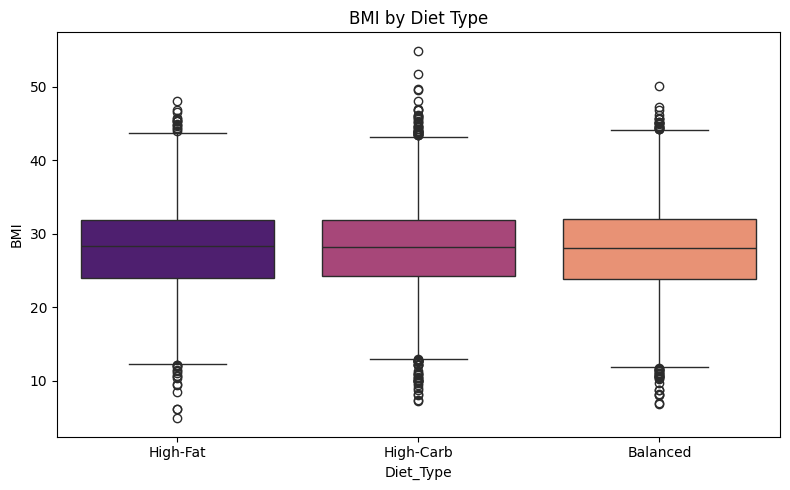

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Diet_Type", y="BMI", palette="magma")
plt.title("BMI by Diet Type")
plt.tight_layout()
plt.show()

## UNIVARIATE ANALYSIS (Single variable)

### Numeric Variables (Histograms)

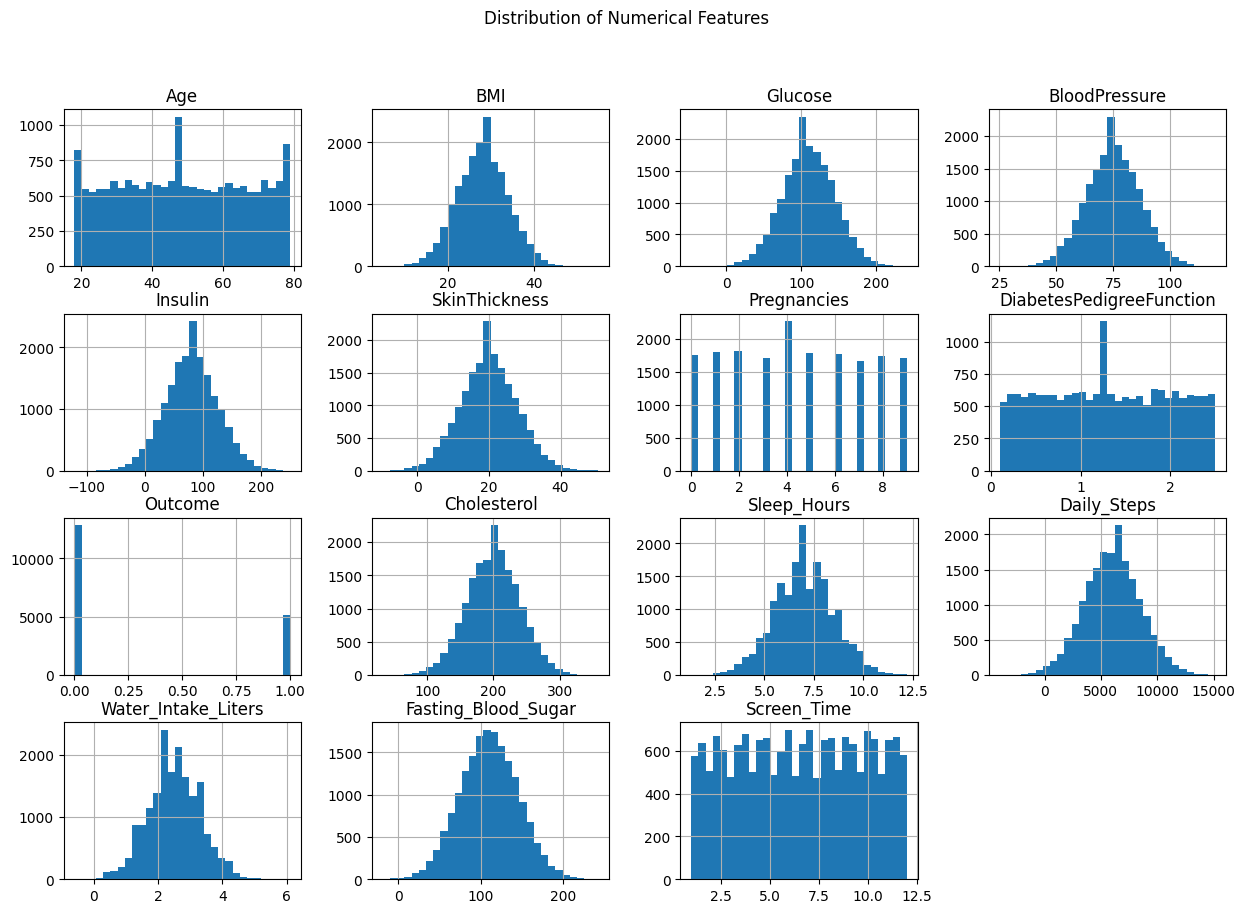

In [23]:
df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

### Categorical Variables (Countplots)

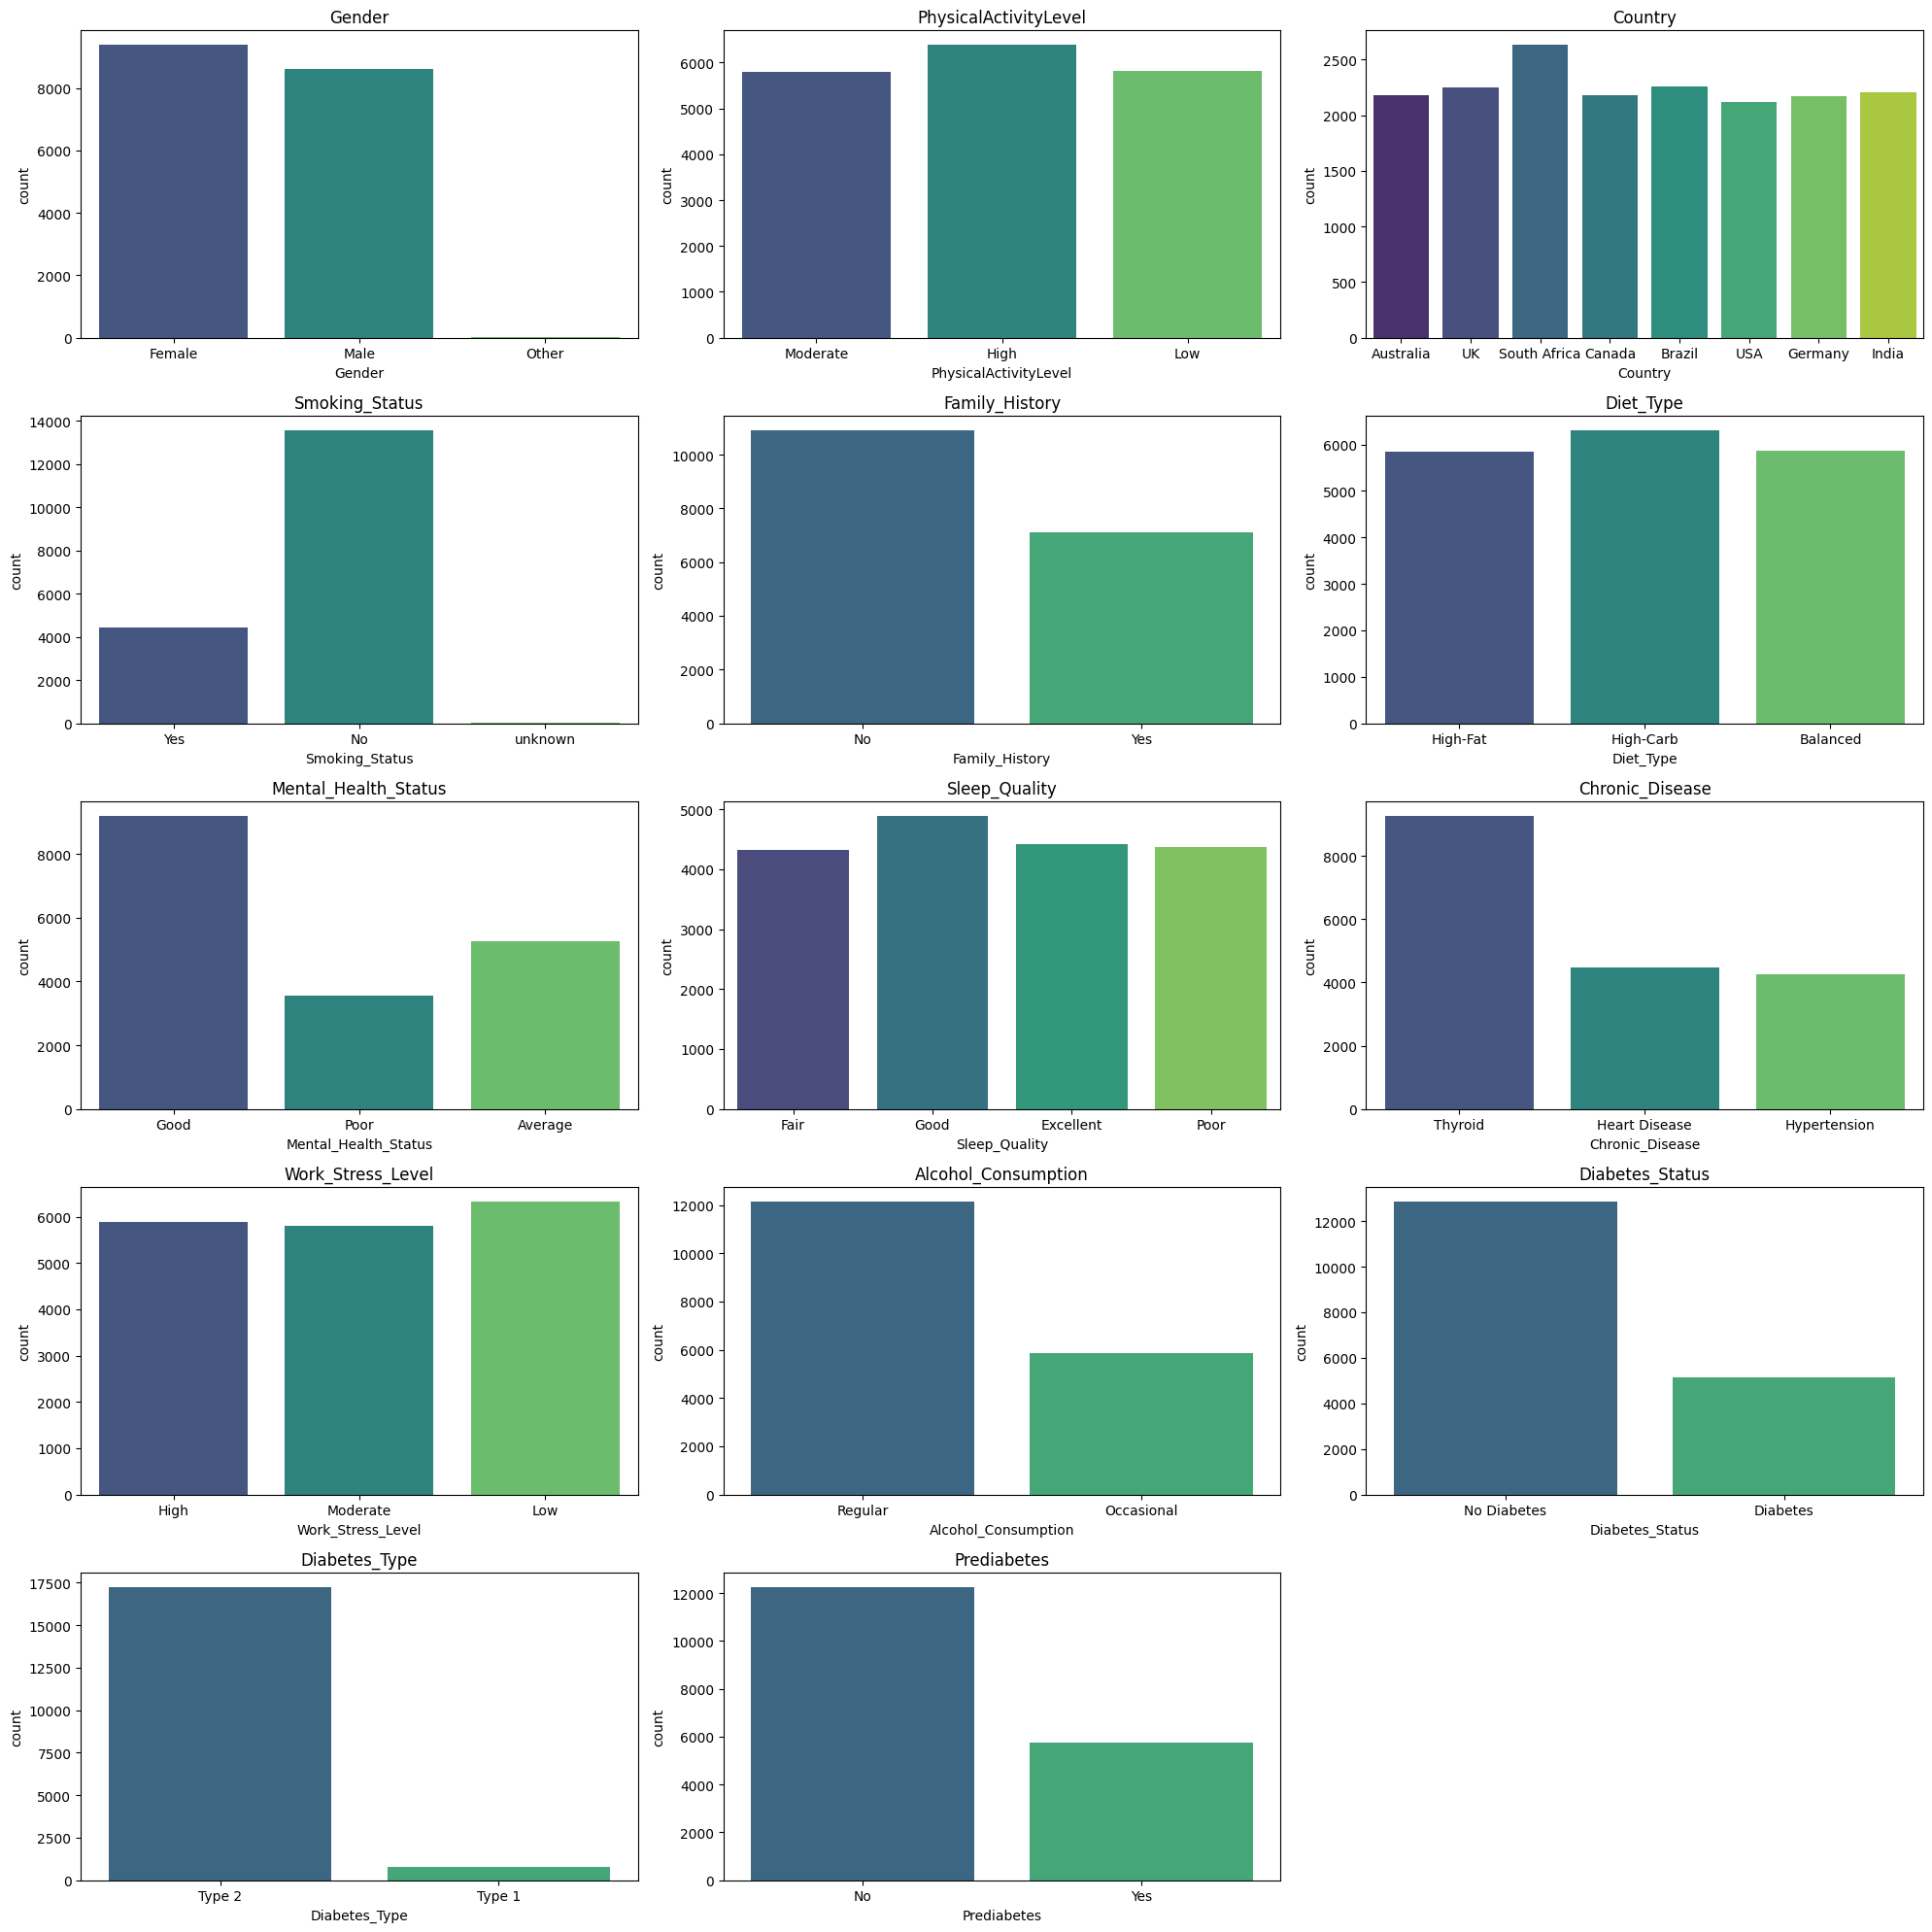

In [24]:
import math

n = len(cat_cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(20,20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(col)

plt.tight_layout()
plt.show()

### Boxplots for Outlier Detection

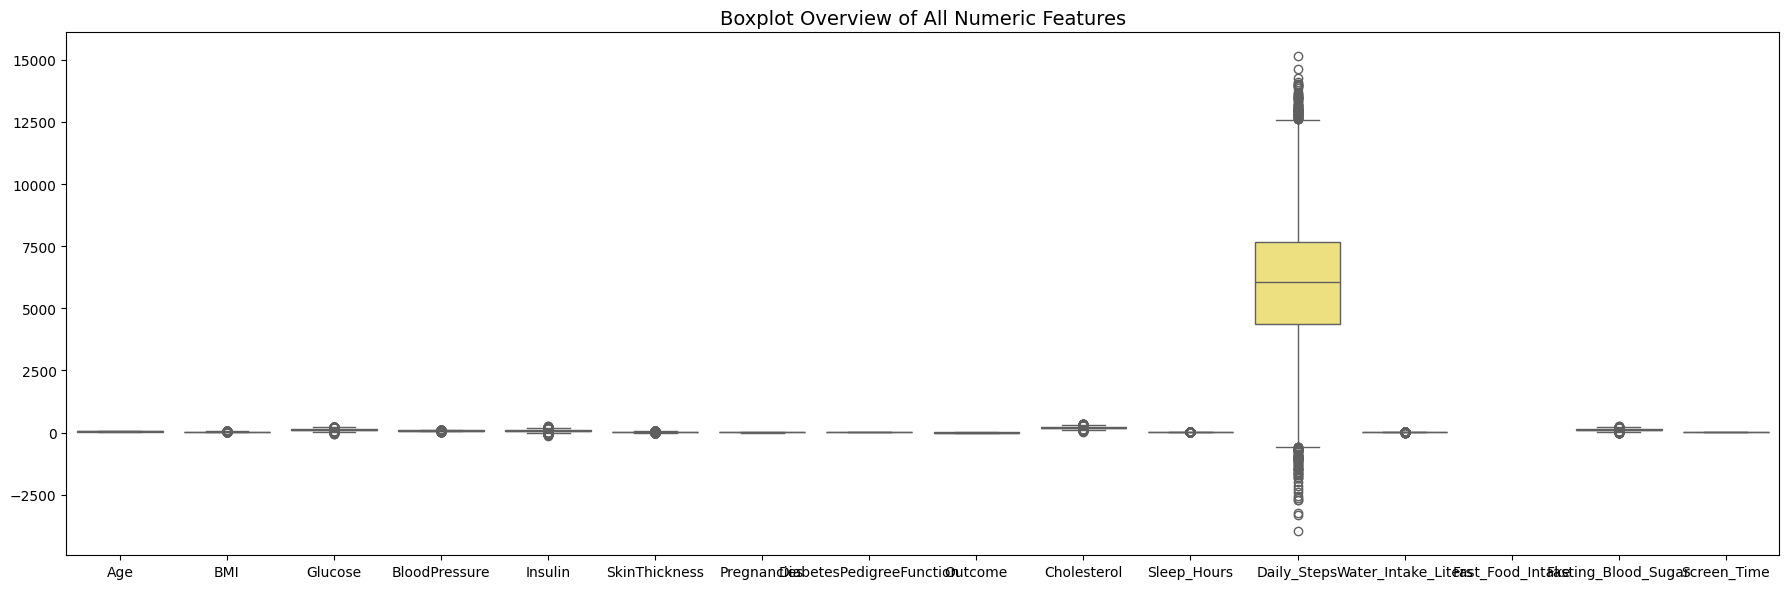

In [25]:
# Select all numeric columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(18, 6))
sns.boxplot(data=df[num_cols], palette="Set3")
plt.title("Boxplot Overview of All Numeric Features", fontsize=14)
plt.tight_layout()
plt.show()

## BIVARIATE ANALYSIS (Two variables)

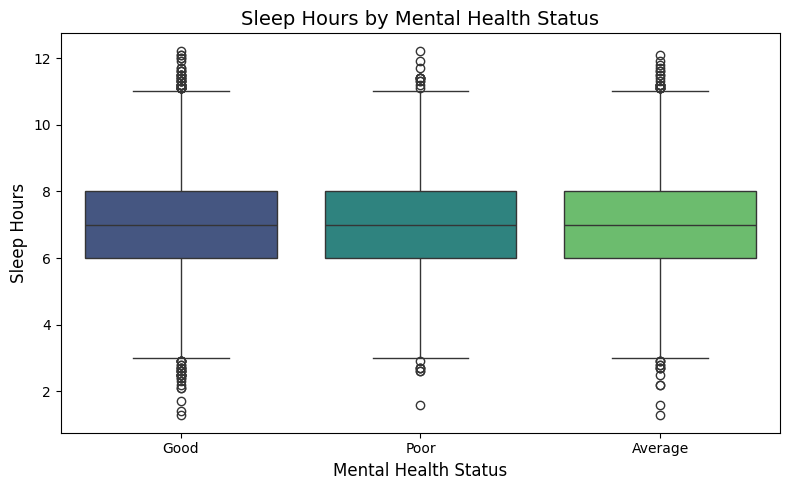

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Mental_Health_Status", y="Sleep_Hours", palette="viridis")

plt.title("Sleep Hours by Mental Health Status", fontsize=14)
plt.xlabel("Mental Health Status", fontsize=12)
plt.ylabel("Sleep Hours", fontsize=12)
plt.tight_layout()
plt.show()

### Average BMI by Smoking Status

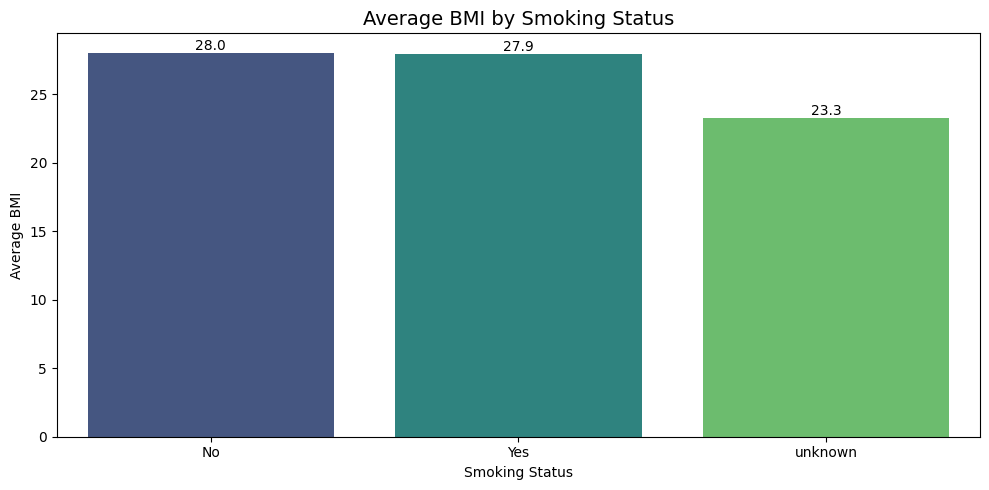

In [27]:
bmi_smoking = (df.groupby("Smoking_Status", as_index=False)["BMI"].mean().sort_values("BMI", ascending=False))

plt.figure(figsize=(10, 5))
sns.barplot(data=bmi_smoking, x="Smoking_Status", y="BMI", palette="viridis")

for index, row in bmi_smoking.iterrows():
    plt.text(index, row["BMI"] + 0.2, round(row["BMI"], 1),ha='center', fontsize=10)

plt.title("Average BMI by Smoking Status", fontsize=14)
plt.xlabel("Smoking Status")
plt.ylabel("Average BMI")
plt.tight_layout()
plt.show()

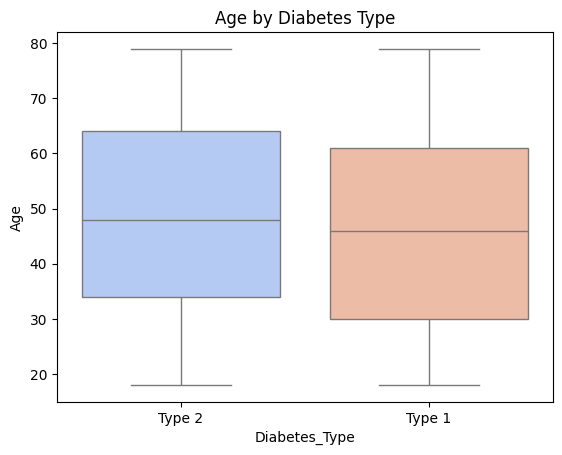

In [28]:
sns.boxplot(data=df, x="Diabetes_Type", y="Age", palette="coolwarm")
plt.title("Age by Diabetes Type")
plt.show()

### Random Sample of 500 Rows

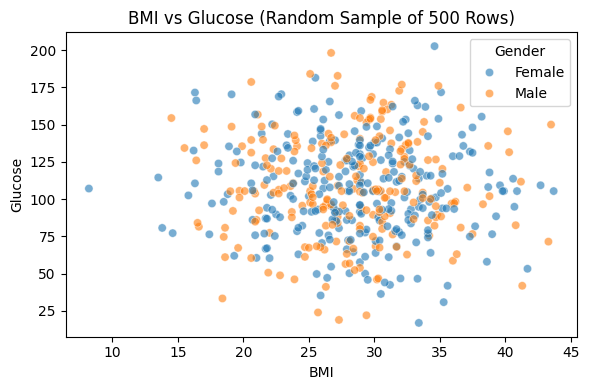

In [29]:
sample_df = df.sample(500, random_state=42)

plt.figure(figsize=(6,4))
sns.scatterplot(data=sample_df,x="BMI",y="Glucose",hue="Gender",alpha=0.6)
plt.title("BMI vs Glucose (Random Sample of 500 Rows)")
plt.tight_layout()
plt.show()

### Random Sample of 2000 Rows

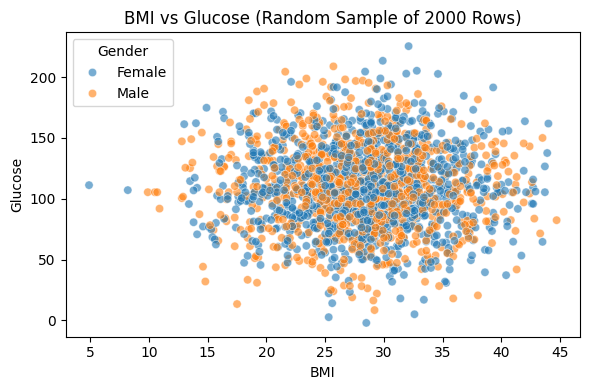

In [30]:
sample_df = df.sample(2000, random_state=42)

plt.figure(figsize=(6,4))
sns.scatterplot(data=sample_df,x="BMI",y="Glucose",hue="Gender",alpha=0.6)
plt.title("BMI vs Glucose (Random Sample of 2000 Rows)")
plt.tight_layout()
plt.show()

### More Detailed

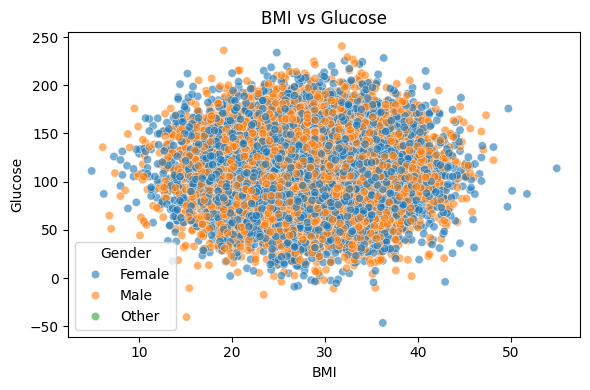

In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="BMI", y="Glucose", hue="Gender", alpha=0.6)
plt.title("BMI vs Glucose")
plt.tight_layout()
plt.show()

### Glucose Levels by Gender

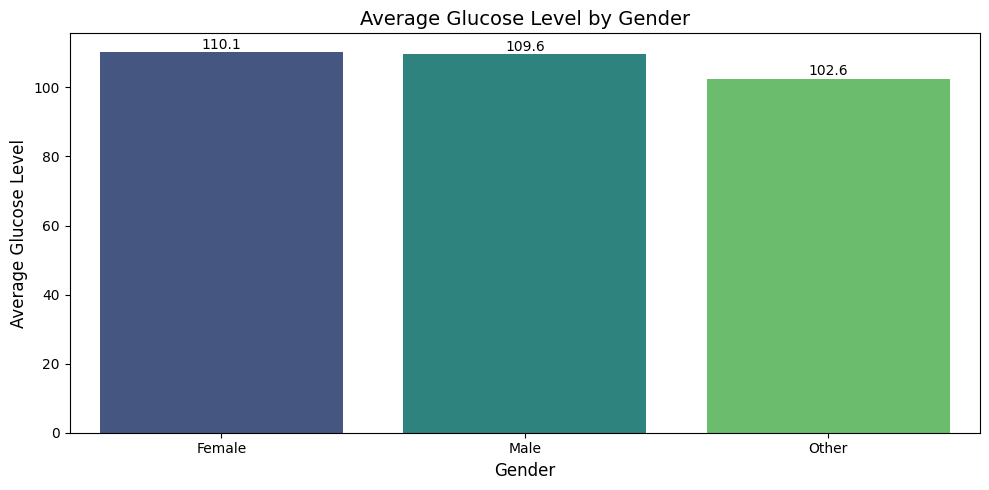

In [32]:
# Average Glucose Level by Gender
glucose_by_gender = (df.groupby("Gender", as_index=False)["Glucose"].mean().sort_values("Glucose", ascending=False))

plt.figure(figsize=(10, 5))
sns.barplot(data=glucose_by_gender, x="Gender", y="Glucose", palette="viridis")
plt.title("Average Glucose Level by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Glucose Level", fontsize=12)

for index, row in glucose_by_gender.iterrows():
    plt.text(index, row["Glucose"] + 1, round(row["Glucose"], 1),ha='center', fontsize=10)

plt.tight_layout()
plt.show()

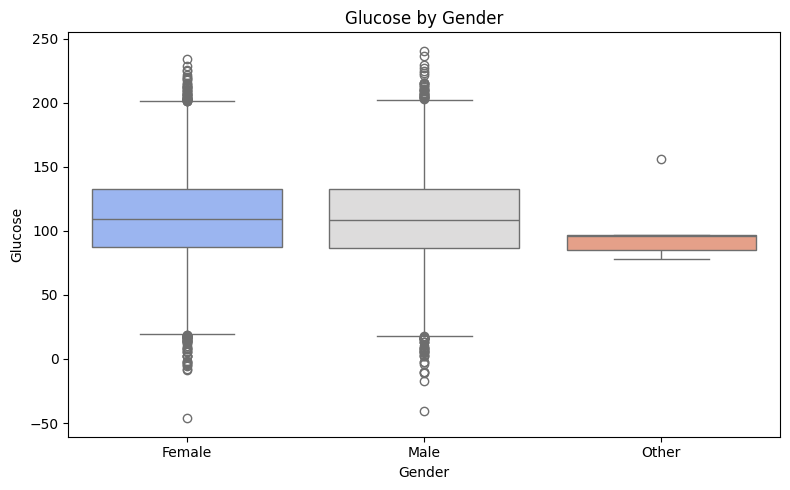

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Gender", y="Glucose", palette="coolwarm")
plt.title("Glucose by Gender")
plt.tight_layout()
plt.show()

### Diabetes Outcome vs Age

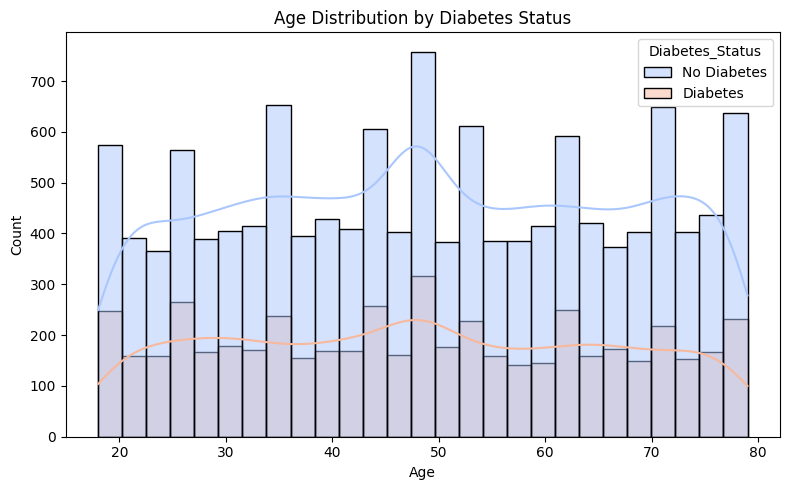

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Diabetes_Status", kde=True, palette="coolwarm")
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

### BMI by Smoking Status

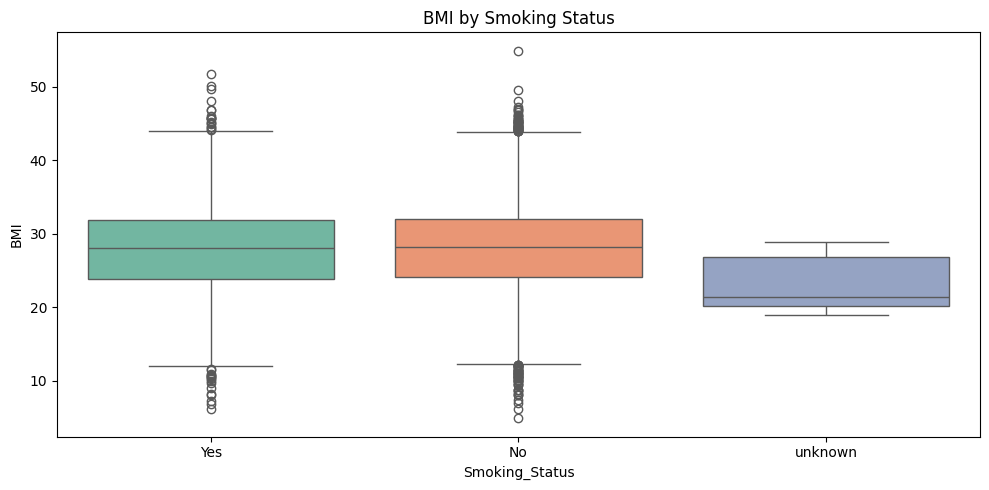

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Smoking_Status", y="BMI", palette="Set2")
plt.title("BMI by Smoking Status")
plt.tight_layout()
plt.show()

### Random Sample of 500 Rows

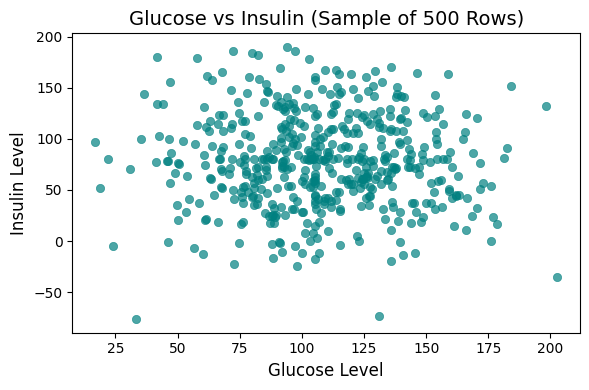

In [36]:
sample_df = df.sample(500, random_state=42)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=sample_df,x="Glucose", y="Insulin",alpha=0.7, edgecolor=None, color="teal")
plt.title("Glucose vs Insulin (Sample of 500 Rows)", fontsize=14)
plt.xlabel("Glucose Level", fontsize=12)
plt.ylabel("Insulin Level", fontsize=12)
plt.tight_layout()
plt.show()

### Random Sample of 2500 Rows

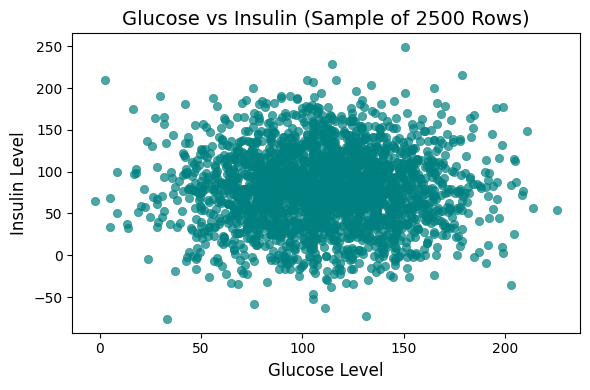

In [37]:
sample_df = df.sample(2500, random_state=42)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=sample_df,x="Glucose", y="Insulin",alpha=0.7, edgecolor=None, color="teal")
plt.title("Glucose vs Insulin (Sample of 2500 Rows)", fontsize=14)
plt.xlabel("Glucose Level", fontsize=12)
plt.ylabel("Insulin Level", fontsize=12)
plt.tight_layout()
plt.show()

### More Detailed

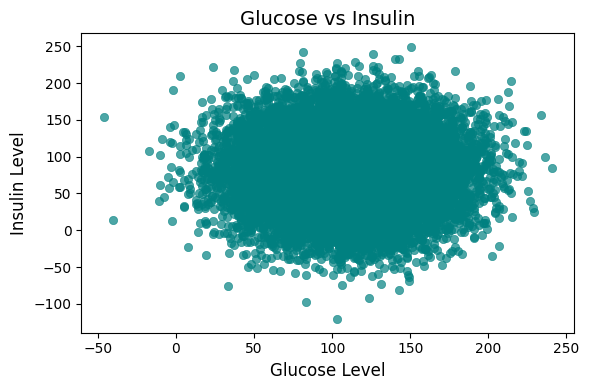

In [38]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df,x="Glucose", y="Insulin",alpha=0.7, edgecolor=None, color="teal")

plt.title("Glucose vs Insulin", fontsize=14)
plt.xlabel("Glucose Level", fontsize=12)
plt.ylabel("Insulin Level", fontsize=12)
plt.tight_layout()
plt.show()

### Compares Glucose vs Diabetes Outcome

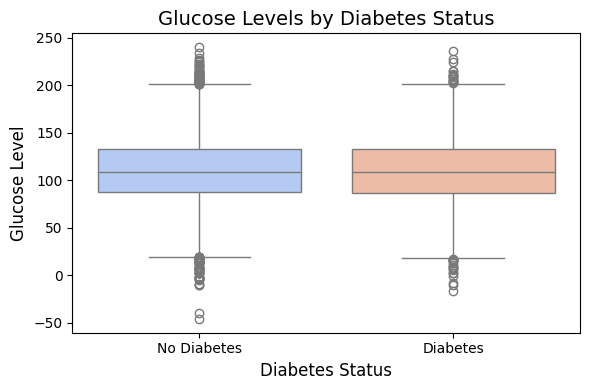

In [39]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Diabetes_Status", y="Glucose", palette="coolwarm")
plt.title("Glucose Levels by Diabetes Status", fontsize=14)
plt.xlabel("Diabetes Status", fontsize=12)
plt.ylabel("Glucose Level", fontsize=12)
plt.tight_layout()
plt.show()

### Relationship between Age and BMI (Regplot)

### Random Sample of 500

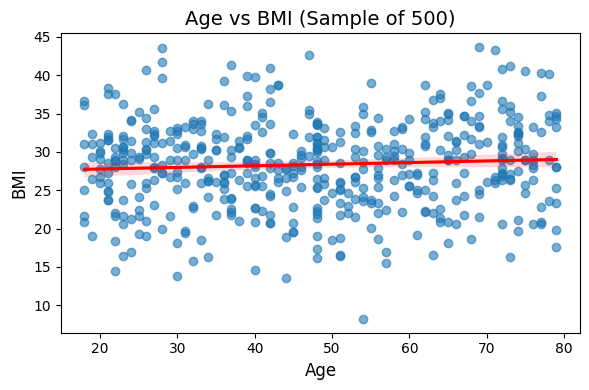

In [40]:
sample_500 = df.sample(500, random_state=42)

plt.figure(figsize=(6, 4))
sns.regplot(data=sample_500, x="Age", y="BMI", scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Age vs BMI (Sample of 500)", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.tight_layout()
plt.show()

### Random Sample of 2500

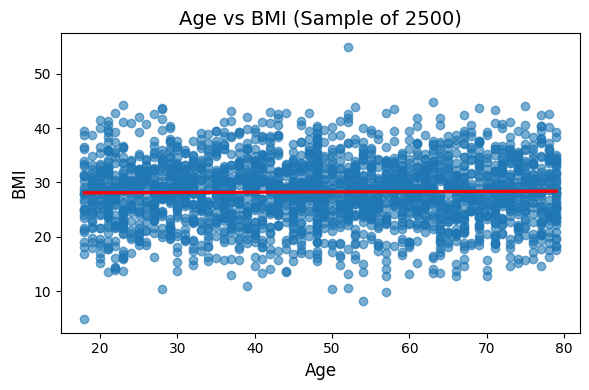

In [41]:
sample_2500 = df.sample(2500, random_state=42)

plt.figure(figsize=(6, 4))
sns.regplot(data=sample_2500, x="Age", y="BMI",scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Age vs BMI (Sample of 2500)", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.tight_layout()
plt.show()

## MULTIVARIATE ANALYSIS (Three or more variables)

### Correlation Heatmap (All numeric variables)

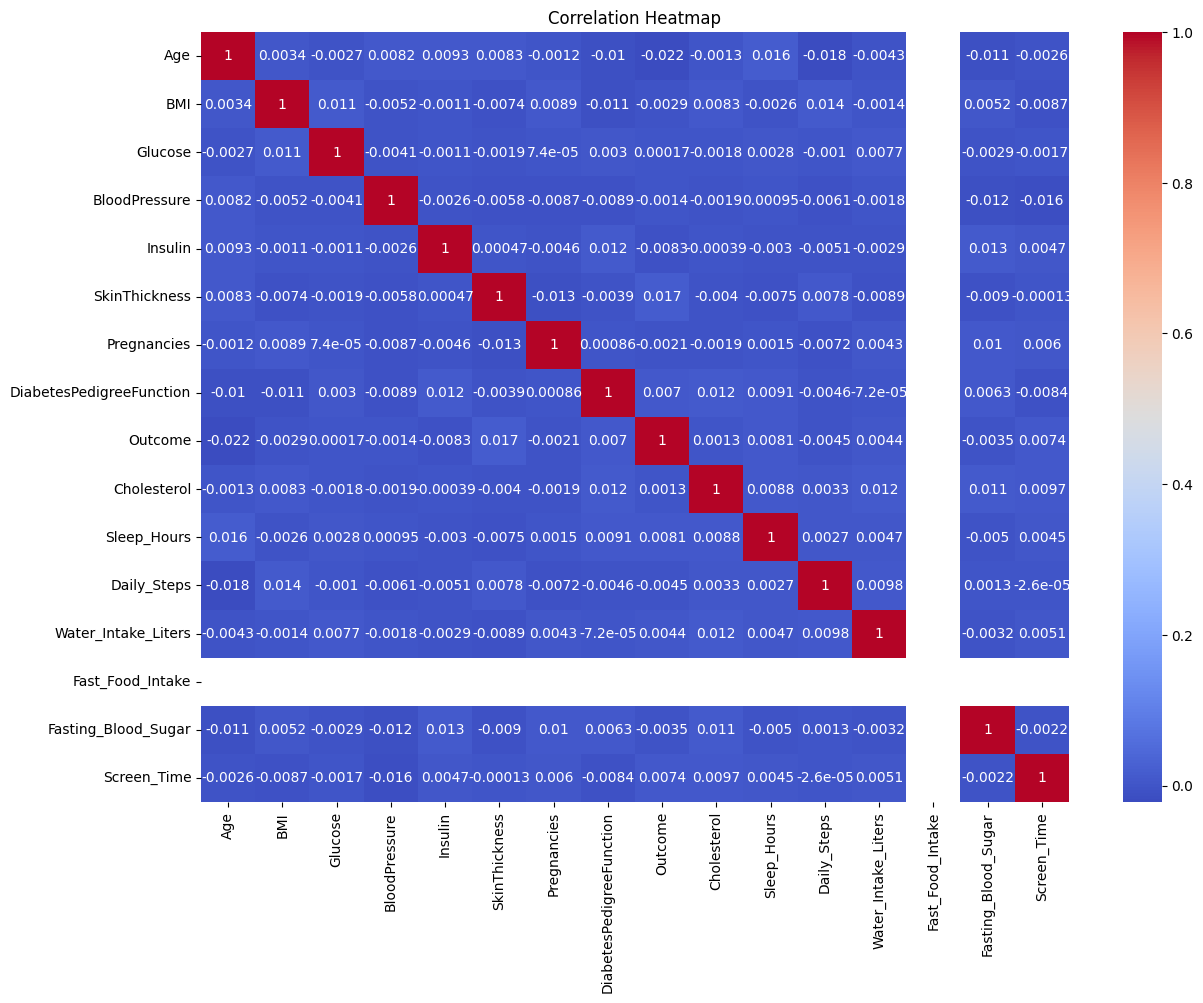

In [42]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Pairplot of Top Health Indicators

### with Random Sample of 500 Rows

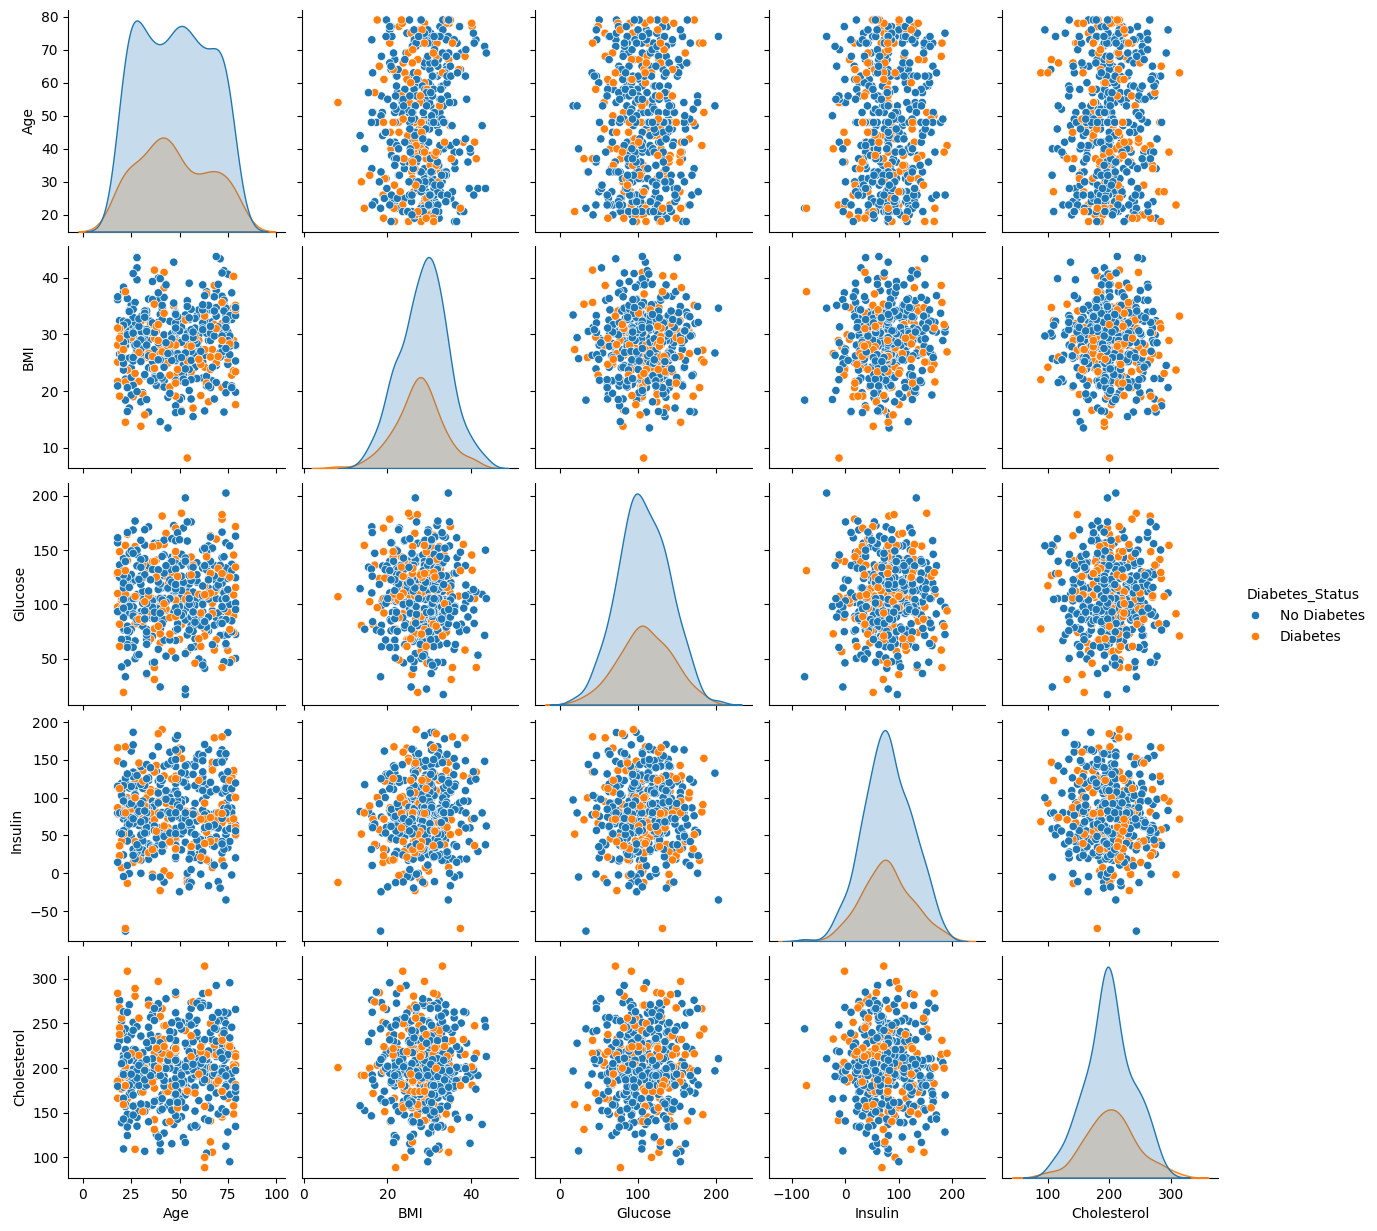

In [43]:
sample_500 = df.sample(500, random_state=42)
sns.pairplot(sample_500[["Age", "BMI", "Glucose", "Insulin", "Cholesterol", "Diabetes_Status"]],hue="Diabetes_Status",diag_kind="kde")
plt.show()

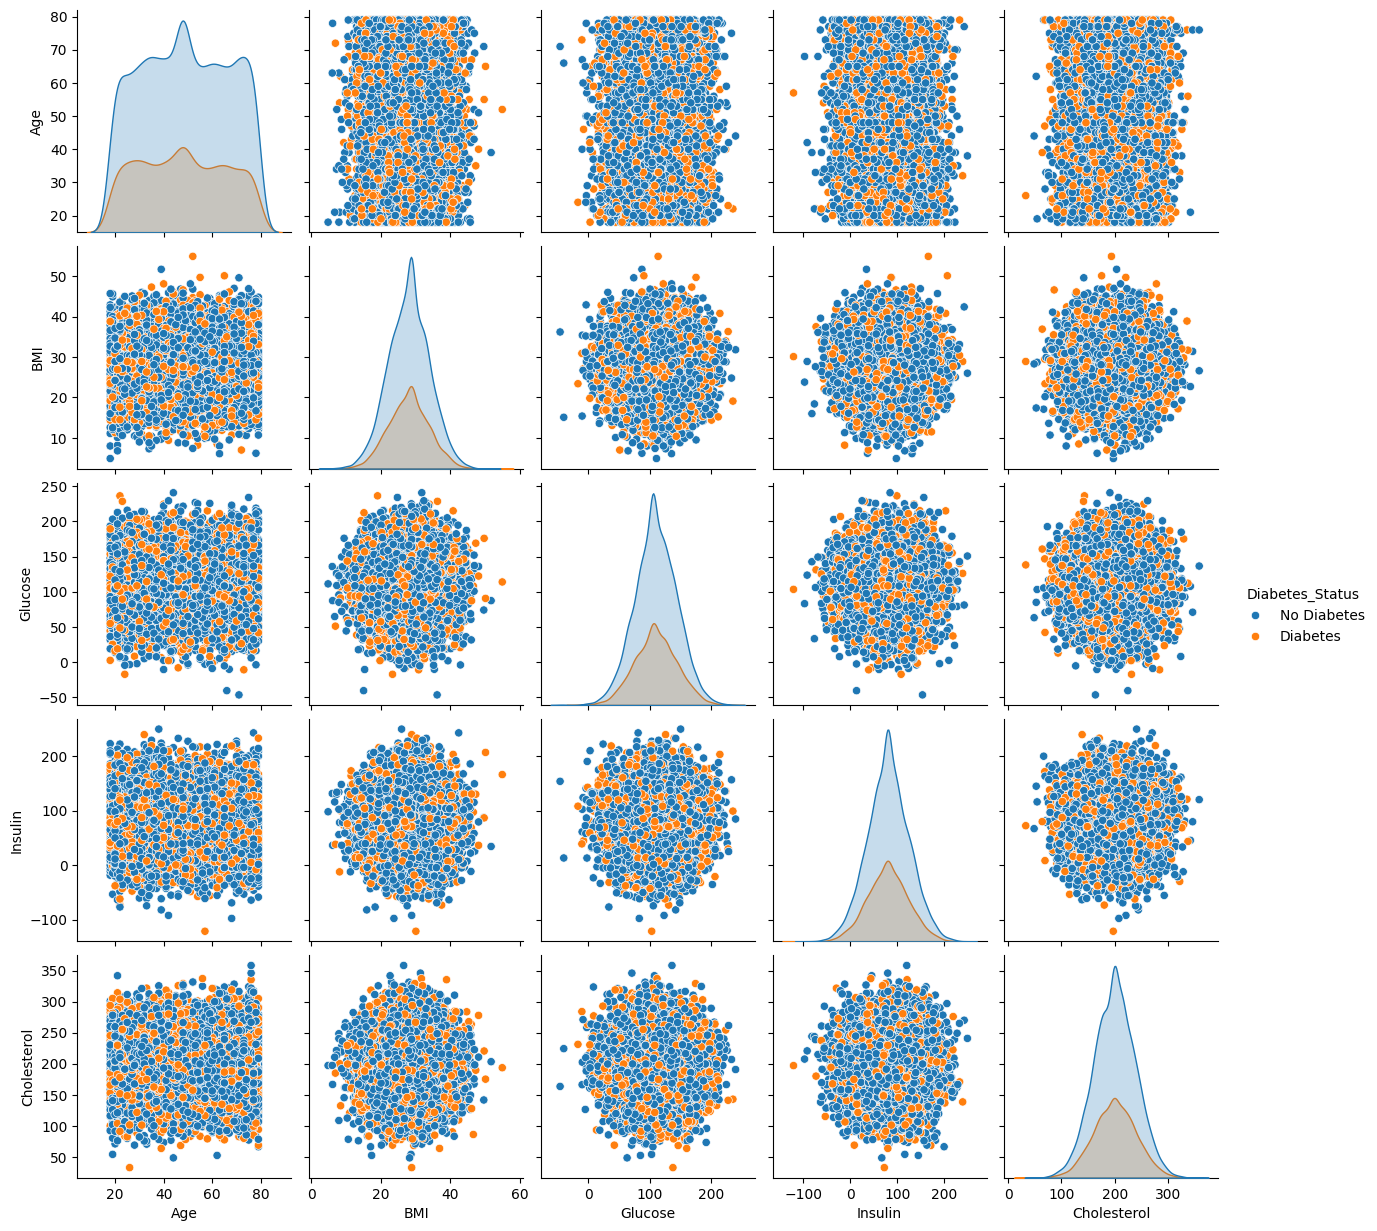

In [44]:
sns.pairplot(df[["Age", "BMI", "Glucose", "Insulin", "Cholesterol", "Diabetes_Status"]],
             hue="Diabetes_Status", diag_kind="kde")
plt.show()

### Water Intake vs BP colored by Diabetes Outcome

### Random Sample of 500 Rows

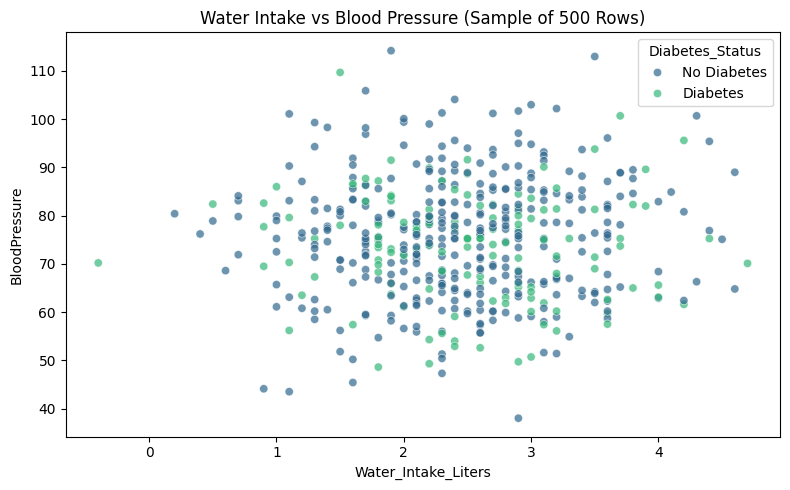

In [45]:
sample_df = df.sample(500, random_state=42)

plt.figure(figsize=(8,5))
sns.scatterplot(data=sample_df,x="Water_Intake_Liters",y="BloodPressure",hue="Diabetes_Status",alpha=0.7,palette="viridis")
plt.title("Water Intake vs Blood Pressure (Sample of 500 Rows)")
plt.tight_layout()
plt.show()

### Random Sample of 1500 Rows

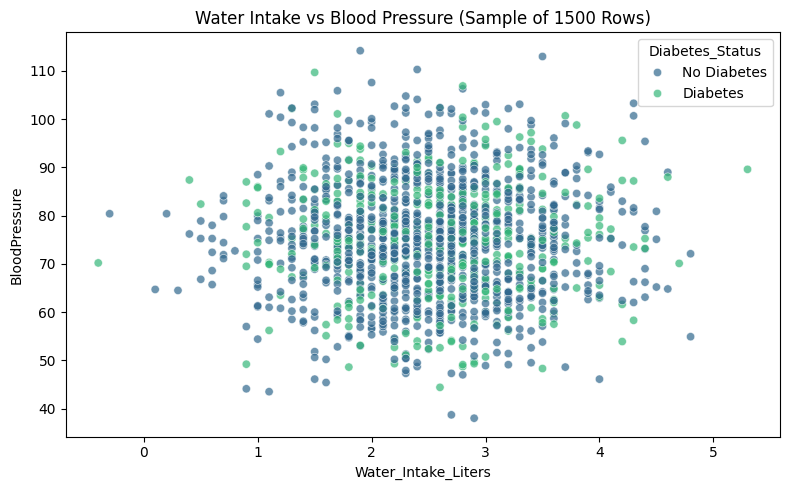

In [46]:
sample_df = df.sample(1500, random_state=42)

plt.figure(figsize=(8,5))
sns.scatterplot(data=sample_df,x="Water_Intake_Liters",y="BloodPressure",hue="Diabetes_Status",alpha=0.7,palette="viridis")
plt.title("Water Intake vs Blood Pressure (Sample of 1500 Rows)")
plt.tight_layout()
plt.show()

### More Detailed

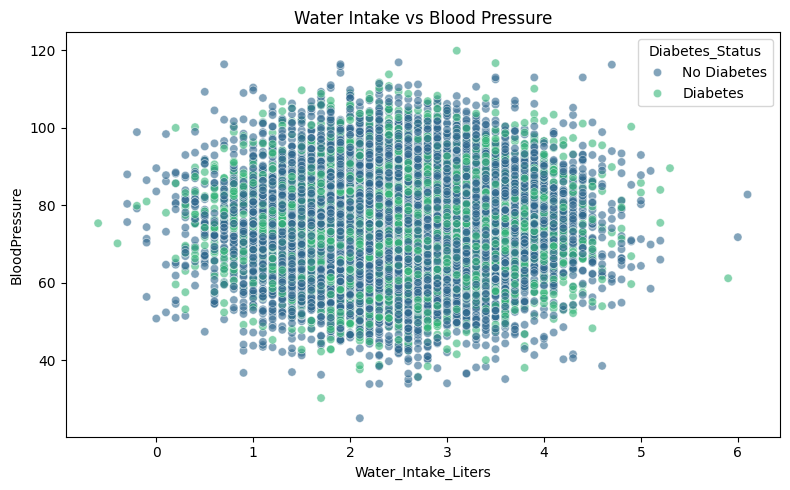

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Water_Intake_Liters", y="BloodPressure",hue="Diabetes_Status", alpha=0.6, palette="viridis")
plt.title("Water Intake vs Blood Pressure")
plt.tight_layout()
plt.show()

### Diet Type + BMI + Diabetes Outcome (Boxplot)

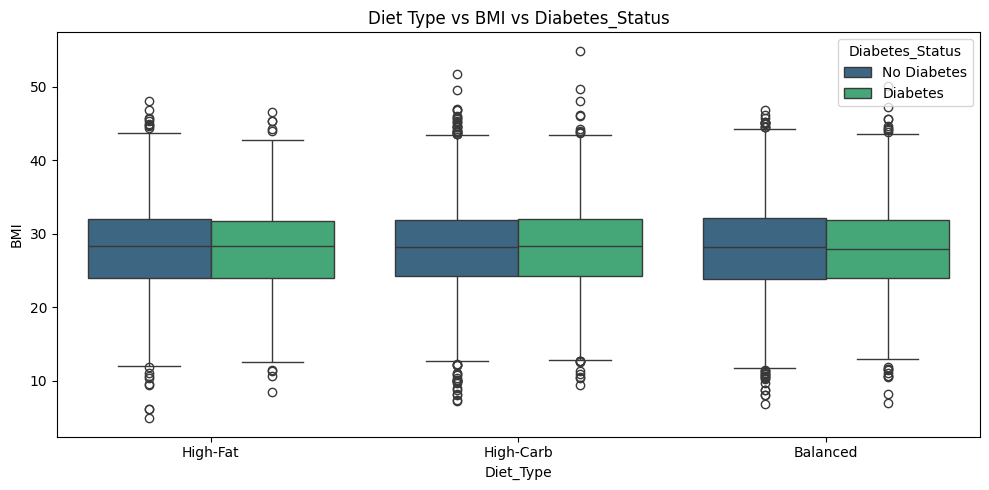

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Diet_Type", y="BMI", hue="Diabetes_Status", palette="viridis")
plt.title("Diet Type vs BMI vs Diabetes_Status")
plt.tight_layout()
plt.show()

### Glucose vs Insulin

### Random Sample of 500 Rows

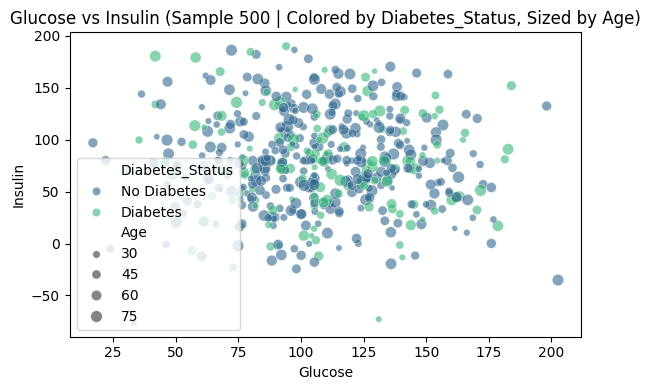

In [49]:
sample_500 = df.sample(500, random_state=42)

plt.figure(figsize=(6,4))
sns.scatterplot(data=sample_500,x="Glucose", y="Insulin", hue="Diabetes_Status", size="Age", alpha=0.6, palette="viridis")
plt.title("Glucose vs Insulin (Sample 500 | Colored by Diabetes_Status, Sized by Age)")
plt.tight_layout()
plt.show()

### Random Sample of 2500 Rows

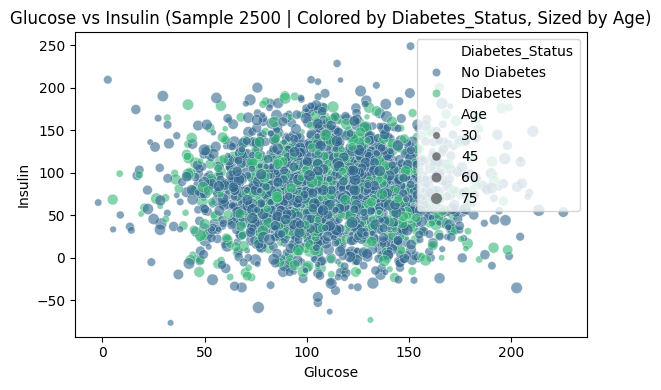

In [50]:
sample_500 = df.sample(2500, random_state=42)

plt.figure(figsize=(6,4))
sns.scatterplot(data=sample_500,x="Glucose", y="Insulin", hue="Diabetes_Status", size="Age", alpha=0.6, palette="viridis")
plt.title("Glucose vs Insulin (Sample 2500 | Colored by Diabetes_Status, Sized by Age)")
plt.tight_layout()
plt.show()

### More Detailed

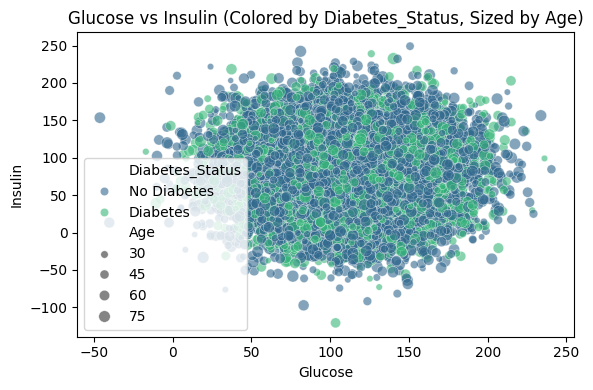

In [51]:
plt.figure(figsize=(6,4)) 
sns.scatterplot(data=df, x="Glucose", y="Insulin", hue="Diabetes_Status", size="Age", alpha=0.6, palette="viridis") 
plt.title("Glucose vs Insulin (Colored by Diabetes_Status, Sized by Age)") 
plt.tight_layout() 
plt.show()

### Feature Correlation with Diabetes Outcome

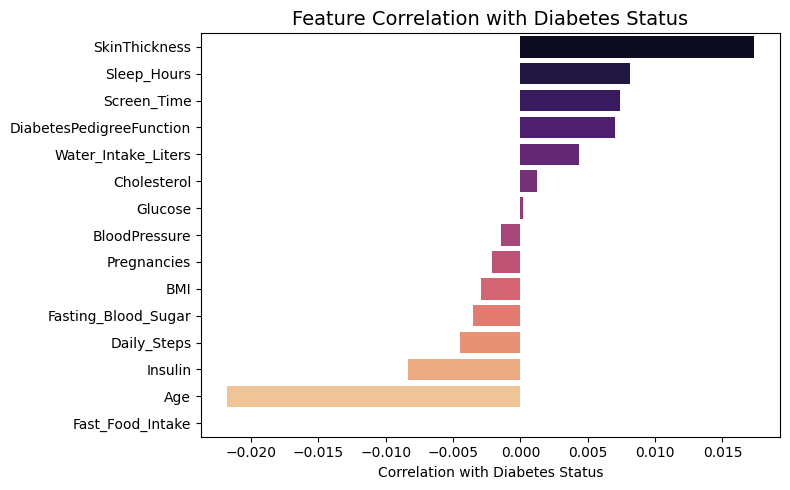

In [52]:
corr_with_outcome = (df.corr(numeric_only=True)["Outcome"].drop("Outcome").sort_values(ascending=False))
corr_with_outcome.index.name = "" 

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_outcome.values,y=corr_with_outcome.index,palette="magma")
plt.title("Feature Correlation with Diabetes Status", fontsize=14)
plt.xlabel("Correlation with Diabetes Status")
plt.tight_layout()
plt.show()